# TP2 - NLP

In [1]:
# Import des bibliothèques nécessaires

# Exercice 1:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import recall_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import requests
from bs4 import BeautifulSoup

# Exercice 2:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec

# Exercice 3:
from sklearn.metrics import classification_report

# Communs:
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score


## Exercice 1:

In [2]:
# Chargement des données
url = "https://raw.githubusercontent.com/alexissavva/cour_2600/main/nlp_1.csv"
data = pd.read_csv(url, delimiter=';')

data.head()

,labels,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1: Naive Bayes

In [3]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['labels'], test_size=0.2, random_state=42)

# Créer le modèle Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur les données de test
predictions = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9811151079136691
Recall: 0.9811151079136691
F1-Score: 0.9807792982020312


### Question 2: Perceptron

In [4]:
# Créer le modèle Perceptron
perceptron_model = make_pipeline(CountVectorizer(), Perceptron())

# Entraîner le modèle sur les données d'entraînement
perceptron_model.fit(X_train, y_train)

# Prédictions sur les données de test
perceptron_predictions = perceptron_model.predict(X_test)

# Évaluer les performances du modèle Perceptron
perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
perceptron_recall = recall_score(y_test, perceptron_predictions, average='weighted')
perceptron_f1 = f1_score(y_test, perceptron_predictions, average='weighted')

# Afficher les résultats du modèle Perceptron
print(f"Perceptron Accuracy: {perceptron_accuracy}")
print(f"Perceptron Recall: {perceptron_recall}")
print(f"Perceptron F1-Score: {perceptron_f1}")

Perceptron Accuracy: 0.9748201438848921
Perceptron Recall: 0.9748201438848921
Perceptron F1-Score: 0.9743360313895728


### Question 3: Techniques d'amélioration

Prétraitement des données :
- Nettoyage des données pour éliminer les valeurs aberrantes, les valeurs manquantes, etc.
- Utilisation de techniques de lemmatisation pour normaliser le texte.

Optimisation des hyperparamètres :
- Recherche des combinaisons d'hyperparamètres optimales pour le modèle, en utilisant des méthodes comme la validation croisée.

Ingénierie des caractéristiques :
- Utilisation de la représentation TF-IDF pour attribuer des poids aux termes en fonction de leur importance relative.
- Exploration des n-grams pour capturer des relations contextuelles.

Ensemble de modèles :
- Expérimentation avec des ensembles de modèles tels que Random Forest ou Gradient Boosting pour améliorer la robustesse et la précision.

Collecte de plus de données :
- Si possible, l'augmentation de la taille de l'ensemble de données peut aider à améliorer la capacité de généralisation du modèle.

### Question 4: 

In [5]:
# Téléchargement des ressources nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Fonction de prétraitement
def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Charger les données
url = "https://raw.githubusercontent.com/alexissavva/cour_2600/main/nlp_1.csv"
data = pd.read_csv(url, delimiter=';')

# Prétraitement des données
data['text'] = data['text'].apply(preprocess_text)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['labels'], test_size=0.2, random_state=42)

# Créer et entraîner le modèle Perceptron avec TF-IDF
perceptron_model = make_pipeline(TfidfVectorizer(), Perceptron())
perceptron_model.fit(X_train, y_train)

# Prédictions sur les données de test
perceptron_predictions = perceptron_model.predict(X_test)

# Évaluer les performances du modèle Perceptron
perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
perceptron_recall = recall_score(y_test, perceptron_predictions, average='weighted')
perceptron_f1 = f1_score(y_test, perceptron_predictions, average='weighted')

# Afficher les résultats du modèle Perceptron après nettoyage des données
print(f"Perceptron Accuracy après nettoyage des données : {perceptron_accuracy}")
print(f"Perceptron Recall après nettoyage des données : {perceptron_recall}")
print(f"Perceptron F1-Score après nettoyage des données : {perceptron_f1}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anarchy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anarchy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Perceptron Accuracy après nettoyage des données : 0.9739208633093526
Perceptron Recall après nettoyage des données : 0.9739208633093526
Perceptron F1-Score après nettoyage des données : 0.9735315724707365


## Exercice 2 

### Question 1

In [6]:
# URL du site web
url = "https://en.wikipedia.org/wiki/Computer_security"

# Récupération du contenu de la page web
response = requests.get(url)
html_content = response.content

# Utilisation de BeautifulSoup pour analyser le HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Récupération de toutes les données textuelles dans une liste
all_data = []

# Trouver tous les éléments de paragraphe (<p>) sur la page
paragraphs = soup.find_all('p')

# Ajouter le texte de chaque paragraphe à la liste
for paragraph in paragraphs:
    all_data.append(paragraph.get_text())

# Afficher les premières lignes pour vérification
for i in range(min(5, len(all_data))):
    print(f"Data {i + 1}: {all_data[i]}")


Data 1: 

Data 2: Computer security, cybersecurity, digital security or information technology security (IT security) is the protection of computer systems and networks from attacks by malicious actors that may result in unauthorized information disclosure, theft of, or damage to hardware, software, or data, as well as from the disruption or misdirection of the services they provide.[1][2]

Data 3: The field is significant due to the expanded reliance on computer systems, the Internet,[3] and wireless network standards such as Bluetooth and Wi-Fi. Also, due to the growth of smart devices, including smartphones, televisions, and the various devices that constitute the Internet of things (IoT). Cybersecurity is one of the most significant challenges of the contemporary world, due to both the complexity of information systems and the societies they support. Security is of especially high importance for systems that govern large-scale systems with far-reaching physical effects, such as pow

### Question 2

In [7]:
# Téléchargement des ressources nltk
nltk.download('stopwords')

# Fonction de nettoyage des données
def clean_data(text):
    # Lowercasing
    text = text.lower()
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

# URL du site web
url = "https://en.wikipedia.org/wiki/Computer_security"

# Récupération du contenu de la page web
response = requests.get(url)
html_content = response.content

# Utilisation de BeautifulSoup pour analyser le HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Récupération de tous les paragraphes
paragraphs = soup.find_all('p')

# Nettoyage des données et tokenization
cleaned_data = [clean_data(paragraph.get_text()) for paragraph in paragraphs]

# Entraînement du modèle Word2Vec
model = Word2Vec(sentences=cleaned_data, vector_size=100, window=5, min_count=1, workers=4)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anarchy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Question 3 

In [8]:
# Mots les plus proches de "attack"
try:
    similar_words_attack = model.wv.most_similar('attack', topn=5)
    print("Mots les plus proches de 'attack':", similar_words_attack)
except KeyError as e:
    print(f"Erreur : Le mot 'attack' n'est pas dans le vocabulaire du modèle.")

# Mots les plus proches de "protect"
try:
    similar_words_protect = model.wv.most_similar('protect', topn=5)
    print("Mots les plus proches de 'protect':", similar_words_protect)
except KeyError as e:
    print(f"Erreur : Le mot 'protect' n'est pas dans le vocabulaire du modèle.")

# Mots les plus proches de "ai"
try:
    similar_words_ai = model.wv.most_similar('ai', topn=5)
    print("Mots les plus proches de 'ai':", similar_words_ai)
except KeyError as e:
    print(f"Erreur : Le mot 'ai' n'est pas dans le vocabulaire du modèle.")

Mots les plus proches de 'attack': [('secur', 0.5314138531684875), ('card', 0.5268330574035645), ('use', 0.5165506601333618), ('comput', 0.5062582492828369), ('also', 0.48263490200042725)]
Mots les plus proches de 'protect': [('devic', 0.4481413662433624), ('allow', 0.4169432520866394), ('attack', 0.4081542193889618), ('system', 0.3812597990036011), ('loss', 0.3680877685546875)]
Erreur : Le mot 'ai' n'est pas dans le vocabulaire du modèle.


### Question 4 

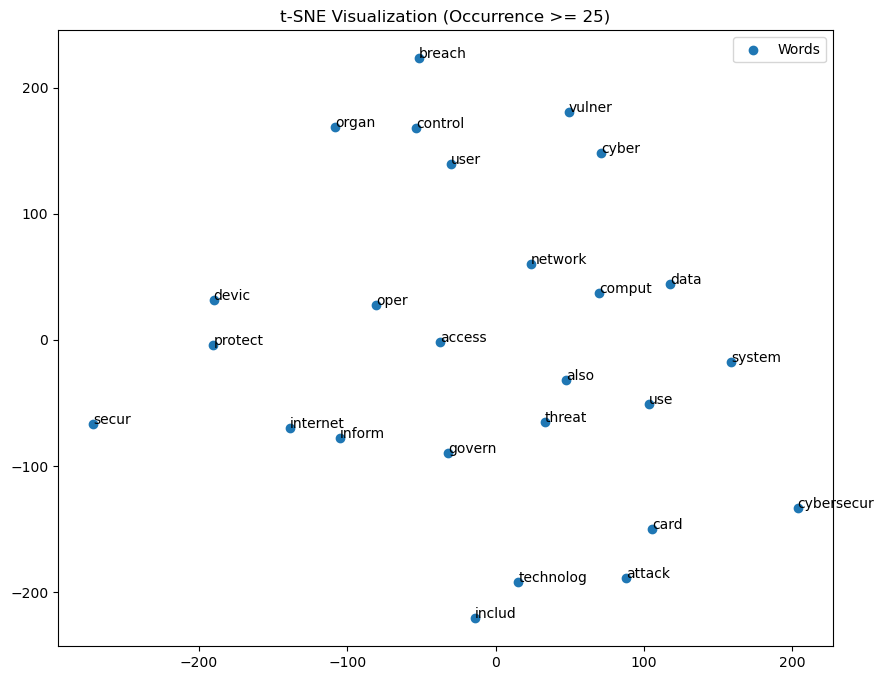

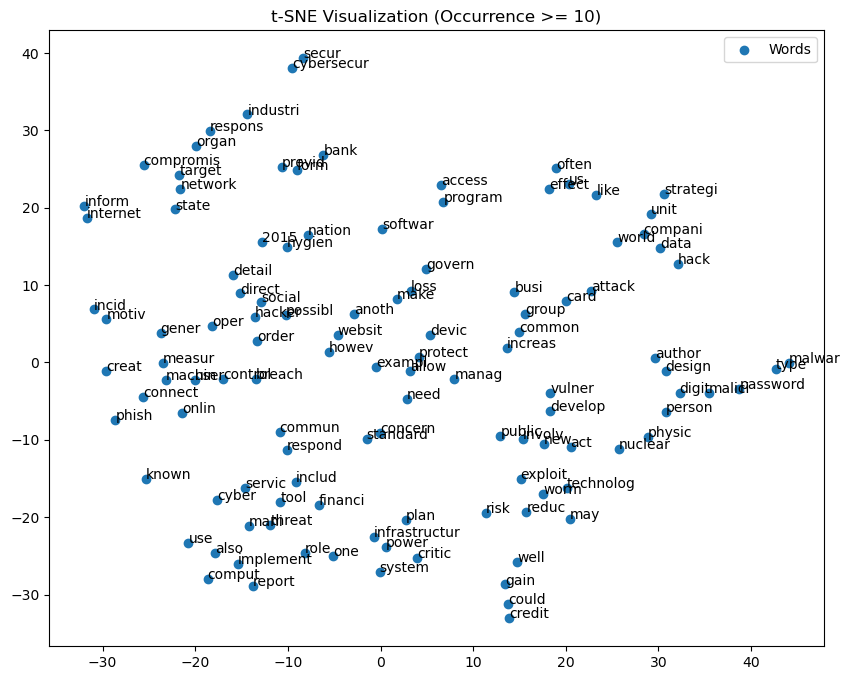

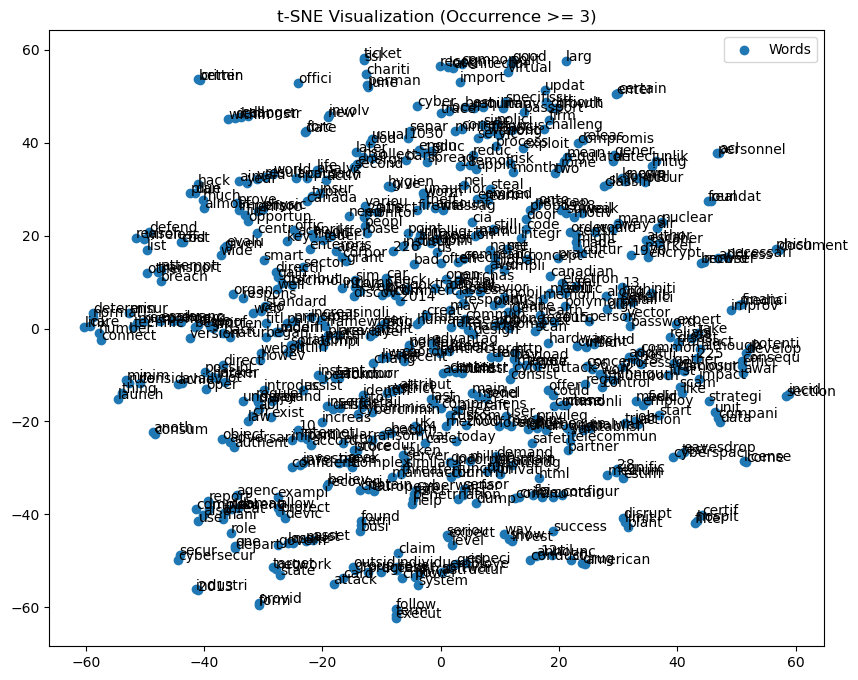

In [9]:
# Fonction pour extraire les mots et les vecteurs associés
def get_vectors_and_words(model, min_occurrence):
    vectors = []
    words = []
    for word, vocab_obj in model.wv.key_to_index.items():
        if model.wv.get_vecattr(word, 'count') >= min_occurrence:
            vectors.append(model.wv[word])
            words.append(word)
    return np.array(vectors), words

# Définir les seuils d'occurrence
occurrence_thresholds = [25, 10, 3]

# Appliquer t-SNE et représenter les mots pour chaque seuil
for min_occurrence in occurrence_thresholds:
    vectors, words = get_vectors_and_words(model, min_occurrence)

    # Appliquer t-SNE pour la réduction de dimension avec une perplexité réduite
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    # Afficher les mots dans l'espace 2D avec matplotlib
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', label='Words')

    for i, word in enumerate(words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.title(f't-SNE Visualization (Occurrence >= {min_occurrence})')
    plt.legend()
    plt.show()

### Question 5 

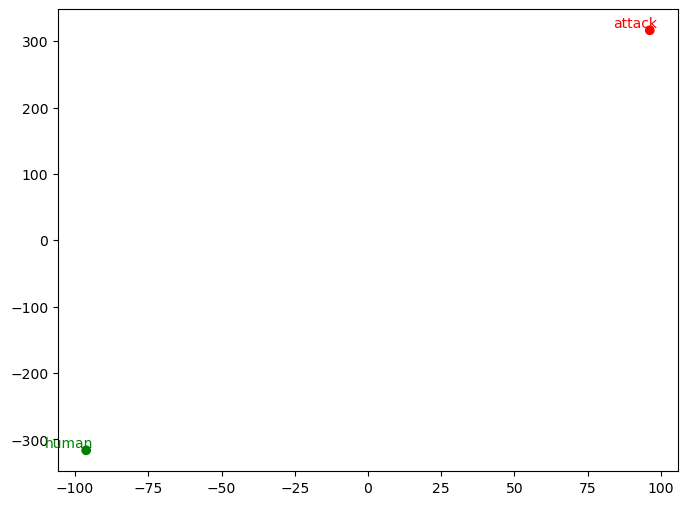

In [10]:
# Obtenez les vecteurs pour les mots "attack" et "human"
vectors_attack = model.wv['attack'].reshape(1, -1)
vectors_human = model.wv['human'].reshape(1, -1)

# Concaténez les vecteurs
vectors_to_plot = np.concatenate([vectors_attack, vectors_human])

# Réduction de dimension avec t-SNE
tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=1).fit_transform(vectors_to_plot)

# Tracer les points
plt.figure(figsize=(8, 6))
plt.scatter(tsne_model[:, 0], tsne_model[:, 1], c=['red', 'green'])

# Ajouter des annotations pour chaque point
plt.annotate('attack', xy=(tsne_model[0, 0], tsne_model[0, 1]), xytext=(5, 2), textcoords='offset points', ha='right', color='red')
plt.annotate('human', xy=(tsne_model[1, 0], tsne_model[1, 1]), xytext=(5, 2), textcoords='offset points', ha='right', color='green')

plt.show()

## Exercice 3 : 

In [11]:
import pandas as pd

# Charger les données depuis l'URL
url = "https://raw.githubusercontent.com/alexissavva/cour_2600/main/emotion_classify_dataset.csv"
data = pd.read_csv(url)

# Afficher les premières lignes du DataFrame
print(data.head())

                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


In [12]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['Emotion'], test_size=0.2, random_state=42)

# Créer un vecteur TF-IDF pour représenter les phrases
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Ajuste le nombre maximum de fonctionnalités selon tes besoins
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialiser et entraîner un classifieur Naive Bayes multinomial
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Prédire les émotions sur l'ensemble de test
y_pred = nb_classifier.predict(X_test_tfidf)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy: 0.9074

Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.94      0.91       392
        fear       0.93      0.89      0.91       416
         joy       0.92      0.89      0.91       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188

